# Predictive maintenance of industrial machinery

_by Virginia Herrero_

## Dataset overview

The dataset used in this project is a synthetic dataset modeled after a milling machine, comprising 10,000 data points organized in rows with 14 distinct features in columns.

**Features**

* `UID`: unique identifier ranging from 1 to 10,000.

* `Product ID`: a combination of a letter (L, M, H) indicating quality (low, medium, high) with respective proportions of 50%, 30%, and 20%, followed by a variant-specific serial number.

* `Type`: product quality represented as a letter (L for low, M for medium, H for high).

* `Air temperature [K]`: generated using a random walk process, normalized to a standard deviation of 2 K around a mean of 300 K.

* `Process temperature [K]`: derived from a random walk process, normalized to a standard deviation of 1 K, and adjusted to the air temperature plus an additional 10 K.

* `Rotational speed [rpm]`: calculated based on a power output of 2860 W, with added normally distributed noise.

* `Torque [Nm]`: normally distributed around 40 Nm with a standard deviation of 10 Nm, ensuring all values are non-negative.

* `Tool wear [min]`: varies by quality variant, with additional wear times of 5, 3, and 2 minutes for high, medium, and low variants, respectively.

* `Machine failure`: a binary label indicating whether a machine failure occurred at this data point. It is set to 1 if at least one of the following independent failure modes is triggered:

    * `Tool Wear Failure (TWF)`: triggered when tool wear reaches a randomly selected time between 200 and 240 minutes.

    * `Heat Dissipation Failure (HDF)`: occurs if the temperature difference between air and process is below 8.6 K and rotational speed is below 1380 rpm.

    * `Power Failure (PWF)`: triggered when the power, calculated as the product of torque and rotational speed (in rad/s), falls below 3500 W or exceeds 9000 W.

    * `Overstrain Failure (OSF)`: occurs if the product of tool wear and torque exceeds thresholds (11,000 minNm for L, 12,000 for M, 13,000 for H).

    * `Random Failures (RNF)`: each process has a 0.1% probability of failing, independent of other parameters.

**Publication Reference**

This dataset is part of the following publication:

_S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), pp. 69-74._

## Data loading
Load the CSV file **predictive-maintenance-dataset-ai4i2020** as a pandas DataFrame.

In [ ]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv("predictive-maintenance-dataset-ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## Data cleaning
Clean and pre-process the dataset prior to conducting further analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

* **Remove unncessary columns**

The columns UDI and Product ID are indexes and lack predictive value; therefore, they are removed from the dataset.

In [ ]:
df = df.drop(["UDI", "Product ID"], axis = 1)

* **Rename columns**

Some column names are renamed to enhance readability and improve comprehension of the dataset.

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
df = df.rename(columns = {"Type" : "Product_quality",
                          "Air temperature [K]" : "Air_temperature_K",
                          "Process temperature [K]" : "Process_temperature_K",
                          "Rotational speed [rpm]" : "Rotational_speed_rpm",
                          "Torque [Nm]" : "Torque_Nm",
                          "Tool wear [min]" : "Tool_wear_min",
                          "Machine failure" : "Machine_failure"})

In [ ]:
df.head()

,Product_quality,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


* **Data types**

Check that all columns have the appropriate data types.

In [ ]:
df.dtypes

Product_quality           object
Air_temperature_K        float64
Process_temperature_K    float64
Rotational_speed_rpm       int64
Torque_Nm                float64
Tool_wear_min              int64
Machine_failure            int64
TWF                        int64
HDF                        int64
PWF                        int64
OSF                        int64
RNF                        int64
dtype: object

Set numerical features **Rotational_speed_rpm** and **Tool_wear_min** to float type.

In [ ]:
df["Rotational_speed_rpm"] = df["Rotational_speed_rpm"].astype("float64")
df["Tool_wear_min"] = df["Tool_wear_min"].astype("float64")

* **Null values**

Identify and remove any missing values from the dataset as needed.

In [ ]:
# Check the total of null values in each column
df.isna().sum()

Product_quality          0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

The dataset has no missing values.

* **Duplicated values**

Check for duplicate entries in the dataset.

In [ ]:
df.duplicated().sum()

np.int64(0)

The dataset has no duplicate values.

* **Outliers**

Examine the statistical summary of the dataset to identify potential outliers. This initial overview will help highlight any unusual values that may require further investigation.

In [ ]:
df.describe()

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


The torque and rotational speed statistics suggest the presence of outliers. However, as mentioned in the dataset overview, extreme values in these features are linked to machinery failure. Therefore, I have decided not to address these outliers to improve prediction accuracy. Nevertheless, the distributions of these two features will be plotted to visualize the extreme values.

Text(0.5, 0.98, 'Rotational Speed Distribution')

<Figure size 640x480 with 0 Axes>

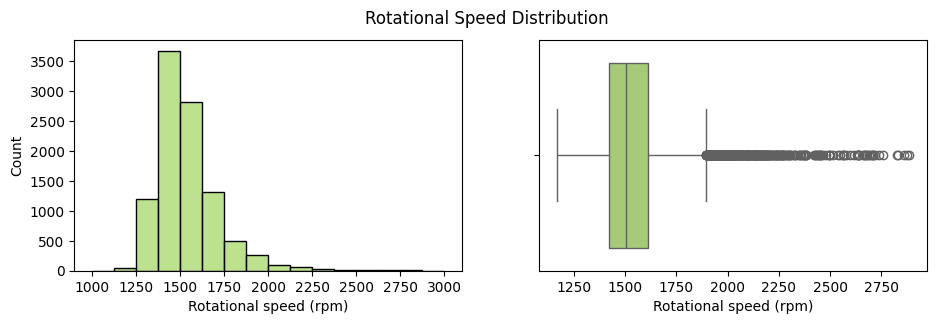

In [ ]:
# Plot the rotational speed distribution using a histogram and boxplot
rotational_speed_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["Rotational_speed_rpm"], ax = ax[0], bins = 16, binrange = (1000, 3000), color = "#a6d96a")
sns.boxplot(x = df["Rotational_speed_rpm"], ax = ax[1], color = "#a6d96a")
ax[0].set_xlabel("Rotational speed (rpm)")
ax[1].set_xlabel("Rotational speed (rpm)")
plt.suptitle("Rotational Speed Distribution", size = 12)

Text(0.5, 0.98, 'Torque Distribution')

<Figure size 640x480 with 0 Axes>

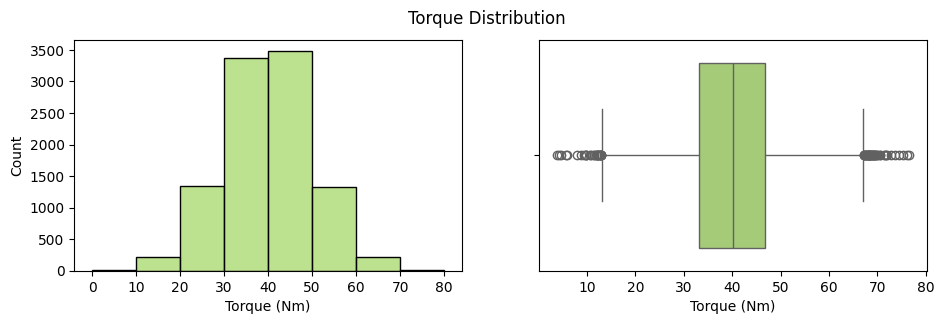

In [ ]:
# Plot torque distribution using a histogram and boxplot
torque_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["Torque_Nm"], ax = ax[0], bins = 8, binrange = (0, 80), color = "#a6d96a")
sns.boxplot(x = df["Torque_Nm"], ax = ax[1], color = "#a6d96a")
ax[0].set_xlabel("Torque (Nm)")
ax[1].set_xlabel("Torque (Nm)")
plt.suptitle("Torque Distribution", size = 12)

* **The clean dataset:**

In [ ]:
predictive_maintenance = df.copy()
predictive_maintenance.head()

,Product_quality,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0
1,L,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0
2,L,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0
3,L,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0
4,L,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0
